In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from zfa.core.default_dirs import DATA_ROOT

from dandi.dandiapi import DandiAPIClient
from pynwb import NWBHDF5IO
from nwbwidgets import nwb2widget

%matplotlib inline
%load_ext autoreload
%autoreload 2

import torch
torch.cuda.is_available()

True

In [9]:
DATA_ROOT

'/om2/group/fiete/zfa/'

sub-20161206-2_ses-20161206T161111_ophys.nwb*


In [6]:
ls $DATA_ROOT/000350/

dandiset.yaml*   sub-20161206-2/  sub-20170113-4/  sub-20170228-4/
sub-20161022-1/  sub-20170111-1/  sub-20170127-1/
sub-20161109-2/  sub-20170113-2/  sub-20170203-1/
sub-20161206-1/  sub-20170113-3/  sub-20170228-3/


In [7]:
ls $DATA_ROOT/000350/sub-20161022-1/*

/om2/group/fiete/zfa//000350/sub-20161022-1/sub-20161022-1_ses-20161022T151003_ophys.nwb*


In [2]:
io = NWBHDF5IO(os.path.join(DATA_ROOT, "000350/sub-20161022-1/sub-20161022-1_ses-20161022T151003_ophys.nwb"), mode="r", load_namespaces=True)
nwbfile = io.read()

/om2/user/leokoz8/envs/zfa/lib/python3.10/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/om2/user/leokoz8/envs/zfa/lib/python3.10/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/om2/user/leokoz8/envs/zfa/lib/python3.10/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [8]:
nwbfile.acquisition['SwimSignals'].data[:100].shape

(100, 2)

Text(0, 0.5, 'Yay')

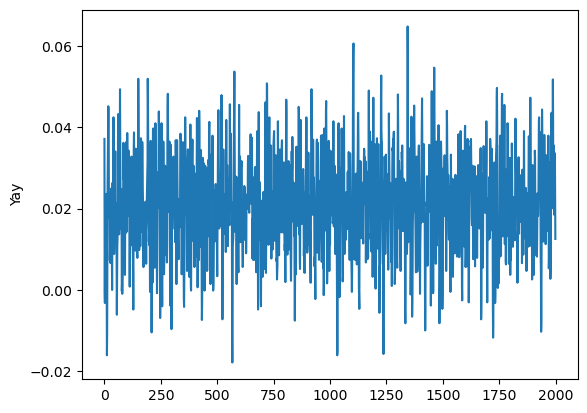

In [9]:
plt.plot(nwbfile.acquisition['SwimSignals'].data[:2000, 0])
plt.ylabel('Yay')

In [29]:
ls $DATA_ROOT/000350

dandiset.yaml*   sub-20161206-2/  sub-20170113-4/  sub-20170228-4/
sub-20161022-1/  sub-20170111-1/  sub-20170127-1/
sub-20161109-2/  sub-20170113-2/  sub-20170203-1/
sub-20161206-1/  sub-20170113-3/  sub-20170228-3/


In [76]:
all_files = print_contents('/om2/group/fiete/zfa/000350')

In [75]:
def contains_substring(dictionary, substring):
    for key in dictionary.keys():
        if substring in key:
            return True
    return False


def print_contents(directory):
    all_files = []
    for root, dirs, files in os.walk(directory):
        #for dir in dirs:
            #print(f"Subdirectory: {os.path.join(root, dir)}")
        for file in files:
            #print(f"File: {os.path.join(root, file)}")
            all_files.append(os.path.join(root, file))
    return all_files

In [78]:
all_files[1:]

['/om2/group/fiete/zfa/000350/sub-20161022-1/sub-20161022-1_ses-20161022T151003_ophys.nwb',
 '/om2/group/fiete/zfa/000350/sub-20161109-2/sub-20161109-2_ses-20161109T211950_ophys.nwb',
 '/om2/group/fiete/zfa/000350/sub-20161206-1/sub-20161206-1_ses-20161206T123501_ophys.nwb',
 '/om2/group/fiete/zfa/000350/sub-20161206-2/sub-20161206-2_ses-20161206T161111_ophys.nwb',
 '/om2/group/fiete/zfa/000350/sub-20170111-1/sub-20170111-1_ses-20170111T123355_ophys.nwb',
 '/om2/group/fiete/zfa/000350/sub-20170113-2/sub-20170113-2_ses-20170113T124907_ophys.nwb',
 '/om2/group/fiete/zfa/000350/sub-20170113-3/sub-20170113-3_ses-20170113T150834_ophys.nwb',
 '/om2/group/fiete/zfa/000350/sub-20170113-4/sub-20170113-4_ses-20170113T171241_ophys.nwb',
 '/om2/group/fiete/zfa/000350/sub-20170127-1/sub-20170127-1_ses-20170127T111652_ophys.nwb',
 '/om2/group/fiete/zfa/000350/sub-20170203-1/sub-20170203-1_ses-20170203T122038_ophys.nwb',
 '/om2/group/fiete/zfa/000350/sub-20170228-3/sub-20170228-3_ses-20170228T165730_

In [80]:
# has both neurons and glia
# 000350/sub-20170228-3/sub-20170228-3_ses-20170228T165730_ophys.nwb


# /om2/group/fiete/zfa/000350/sub-20161109-2/sub-20161109-2_ses-20161109T211950_ophys.nwb
# /om2/group/fiete/zfa/000350/sub-20170203-1/sub-20170203-1_ses-20170203T122038_ophys.nwb
# /om2/group/fiete/zfa/000350/sub-20170228-3/sub-20170228-3_ses-20170228T165730_ophys.nwb
# /om2/group/fiete/zfa/000350/sub-20170228-4/sub-20170228-4_ses-20170228T185002_ophys.nwb

for file in all_files[1:]:
    io = NWBHDF5IO(file, mode="r", load_namespaces=True)
    nwbfile = io.read()
    if contains_substring(nwbfile.acquisition, 'Glia'):
        print(file)


/om2/user/leokoz8/envs/zfa/lib/python3.10/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/om2/user/leokoz8/envs/zfa/lib/python3.10/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/om2/user/leokoz8/envs/zfa/lib/python3.10/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


/om2/group/fiete/zfa/000350/sub-20161109-2/sub-20161109-2_ses-20161109T211950_ophys.nwb
/om2/group/fiete/zfa/000350/sub-20170203-1/sub-20170203-1_ses-20170203T122038_ophys.nwb
/om2/group/fiete/zfa/000350/sub-20170228-3/sub-20170228-3_ses-20170228T165730_ophys.nwb
/om2/group/fiete/zfa/000350/sub-20170228-4/sub-20170228-4_ses-20170228T185002_ophys.nwb


In [2]:
io = NWBHDF5IO('/om2/group/fiete/zfa/000350/sub-20161109-2/sub-20161109-2_ses-20161109T211950_ophys.nwb', mode="r", load_namespaces=True)
nwbfile = io.read()
nwbfile.acquisition.keys()

/om2/user/leokoz8/envs/zfa/lib/python3.10/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/om2/user/leokoz8/envs/zfa/lib/python3.10/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/om2/user/leokoz8/envs/zfa/lib/python3.10/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


dict_keys(['BaselineStimulusVelocitySignal', 'FrameCaptureTTLSignal', 'GliaTwoPhotonSeries', 'NeuronTwoPhotonSeries', 'StimulusGainSignal', 'StimulusParameterSignals', 'StimulusTypeSignal', 'SwimSignals', 'TotalStimulusVelocitySignal'])

In [52]:
print()  # Will print True

True


In [53]:
nwbfile.processing['ophys']

ophys pynwb.base.ProcessingModule at 0x22850350189536
Fields:
  data_interfaces: {
    DfOverF <class 'pynwb.ophys.DfOverF'>,
    Fluorescence <class 'pynwb.ophys.Fluorescence'>,
    VolumeSegmentation <class 'pynwb.ophys.ImageSegmentation'>
  }
  description: optical physiology processed data

In [54]:
nwbfile.processing['ophys']['DfOverF']['GliaDfOverF'].data.shape

(6067, 126467)

In [7]:
nwbfile.processing['behavior']['ActivityStates']['state_type'][2]

'passive'

In [56]:
glial_trace = nwbfile.processing['ophys']['DfOverF']['GliaDfOverF'].data
glial_times = np.asarray(nwbfile.processing['ophys']['DfOverF']['GliaDfOverF'].timestamps)

In [57]:
np.asarray(glial_times)

array([1.11860558e-02, 5.98203553e-01, 1.18538801e+00, ...,
       3.56046714e+03, 3.56105433e+03, 3.56164151e+03])

In [58]:
state_types = nwbfile.processing['behavior']['ActivityStates']['state_type']
start_times = nwbfile.processing['behavior']['ActivityStates']['start_time']

In [59]:
for t,state in enumerate(state_types):
    if state == 'passive':
        passive_start_time = start_times[t]
        passive_start_ind = np.argmin(np.abs(glial_times-passive_start_time))
        
        
        

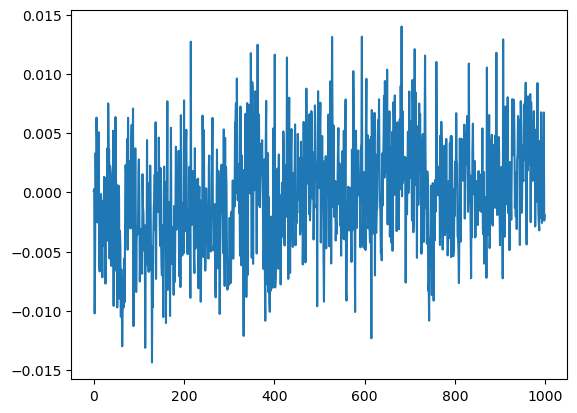

In [60]:
plt.plot(glial_trace[1000:2000,0])

In [61]:
nwbfile.processing['ophys']['DfOverF']['NeuronDfOverF'].data.shape

(6067, 111378)

In [62]:
nwbfile.acquisition["GliaTwoPhotonSeries"].data.shape

(6067, 1024, 2048, 28)

In [63]:
nwbfile.acquisition["NeuronTwoPhotonSeries"].data.shape

(6067, 1024, 2048, 28)

Text(0.5, 1.0, 'Glia')

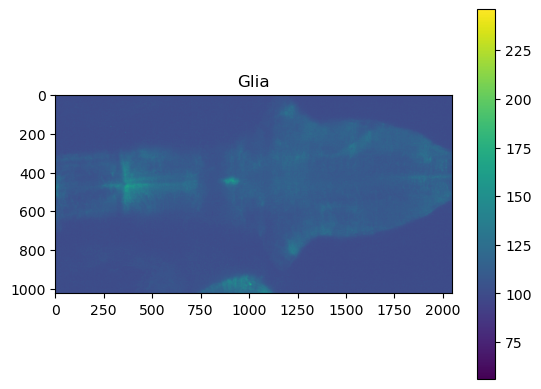

In [64]:
plt.imshow(nwbfile.acquisition["GliaTwoPhotonSeries"].data[1000, :, :, 10])
plt.colorbar()
plt.title("Glia")

Text(0.5, 1.0, 'Neuron')

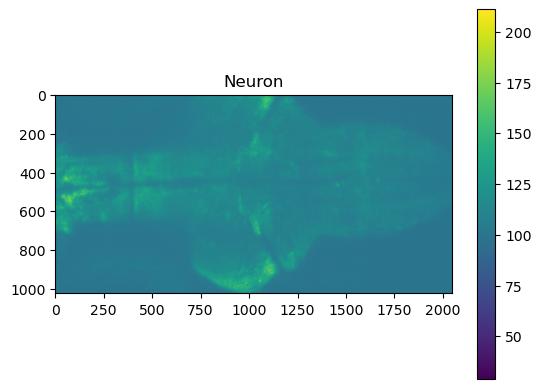

In [65]:
plt.imshow(nwbfile.acquisition["NeuronTwoPhotonSeries"].data[1000, :, :, 10])
plt.colorbar()
plt.title("Neuron")

In [8]:
nwbfile.processing['behavior']['ActivityStates']

glial_trace = nwbfile.processing['ophys']['DfOverF']['GliaDfOverF'].data
neural_trace = nwbfile.processing['ophys']['DfOverF']['NeuronDfOverF'].data
glial_times = np.asarray(nwbfile.processing['ophys']['DfOverF']['GliaDfOverF'].timestamps)

neural_trace = nwbfile.processing['ophys']['DfOverF']

np.asarray(glial_times)

state_types = nwbfile.processing['behavior']['ActivityStates']['state_type']
start_times = nwbfile.processing['behavior']['ActivityStates']['start_time']


In [30]:
nwbfile.acquisition['TotalStimulusVelocitySignal']#.data[:30000])

TotalStimulusVelocitySignal pynwb.base.TimeSeries at 0x23351277372176
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (26633200,), type "<f8">
  description: Raw signal calculating (drift speed - motosensory gain) x swim power.
  offset: 0.0
  rate: 5989.6
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: a.u.

In [12]:
count = 0
for i in state_types:
    if i == 'passive':
        count += 1

In [13]:
count

35

In [68]:
offset = 10
avg_glial_traces = 0
avg_neural_traces = 0

len_state_types = len(state_types)
number_glia_timepoints = len(glial_times)

for t,state in enumerate(state_types):
    if state == 'passive':
        passive_start_time = start_times[t]
        passive_start_ind = np.argmin(np.abs(glial_times-passive_start_time))
        
        print(passive_start_ind)
        if (passive_start_ind > offset) & (passive_start_ind + offset < number_glia_timepoints):
            passive_glial_trace = np.mean(glial_trace[passive_start_ind-offset:passive_start_ind+offset,:],axis = 1)
            #passive_neural_trace = np.mean(neural_trace[passive_start_ind-offset:passive_start_ind+offset,:],axis = 1)
        
            avg_glial_traces += passive_glial_trace
            #avg_neural_traces += passive_neural_trace

453
512
557
606
650
688


KeyboardInterrupt: 

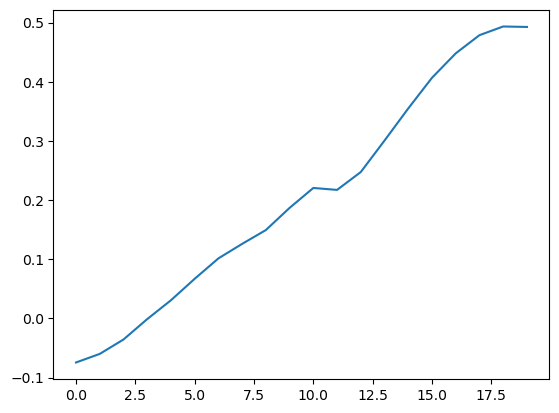

In [ ]:
plt.plot(avg_glial_traces,label = 'Average Glia')

In [ ]:

#neural_trace.shape



state_types[24]


        
        
avg_glial_traces /= len(state_types) 
avg_neural_traces /= len(state_types)

passive_start_time = start_times[24]
passive_start_ind = np.argmin(np.abs(glial_times-passive_start_time))

passive_glial_trace = np.mean(glial_trace[passive_start_ind-offset:passive_start_ind+offset,:],axis = 1)
passive_neural_trace = np.mean(neural_trace[passive_start_ind-offset:passive_start_ind+offset,:],axis = 1)



def normalize_series(series):
    # Ensure the series is in the correct shape for the MinMaxScaler (samples, features)
    reshaped_series = np.array(series).reshape(-1, 1)
    
    # Initialize a scaler, then apply it to the features
    scaler = MinMaxScaler() # default=(0, 1)
    normalized = scaler.fit_transform(reshaped_series)
    
    # Since our time series is a 1-D array, we can flatten the output to get it back into the original shape
    return normalized.flatten()


times_futile = np.linspace(-offset,offset,len(avg_glial_traces))


plt.plot(normalize_series(passive_glial_trace),label = 'Glial')
plt.plot(normalize_series(passive_neural_trace), label = 'Neural')
plt.legend()


from sklearn.preprocessing import MinMaxScaler
import numpy as np

plt.plot(times_futile,normalize_series(avg_glial_traces),label = 'Average Glia')
plt.plot(times_futile,normalize_series(avg_neural_traces),label = 'Average Neurons')
plt.ylabel('Average Delta F/F')
plt.xlabel('Time to Futility')
plt.legend()

453


TypeError: MultiContainerInterface.__make_getitem.<locals>._func: incorrect type for 'name' (got 'tuple', expected 'str')